<a href="https://colab.research.google.com/github/Annany-12/tensorflow-titanic-survival-ml-model/blob/main/Tensorflow_Model_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
import tensorflow as tf
x = sklearn.__version__
y = tf.__version__
print(f"sklearn version: {x}")
print(f"Tensorflow version: {y}")

sklearn version: 1.2.2
Tensorflow version: 2.15.0


## Importing Necessary Libraries
---



In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# absolute_import: Always imports standard library, not a custom module.
# division: Changes division operator / to always perform true division (floating-point division)
# print_function: Of no use, but we can use print statment as function. (Still don't know the use of it)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc # Needed to make a Linear-Regression Model.

import tensorflow as tf

## Importing Dataset

In [4]:
df_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # Training Dataset
df_test = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # Testing Dataset

y_train = df_train.pop('survived') # We grabbed the survived column from the training dataframe, removed it from the dataset and assigned it the 'y_train' variable.
y_test = df_test.pop('survived') # We grabbed the survived column from the testing dataframe, removed it from the dataset and assigned it the 'y_test' variable.

In [5]:
print("Head of the Training Dataframe: ")
print(df_train.head()) # This shows us the first 5 entries of the dataset. Useful for crosschecking without opening the file.
print("==="*10)

print("Head od the Testing Dataframe: ")
print(df_test.head())
print("==="*10)

print("Head of the y_train 'Survived' Column: ")
print(y_train.head())
print("==="*10)

print("Head of the y_test 'Survived' Column: ")
print(y_test.head())
print("==="*10)

Head of the Training Dataframe: 
      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  
Head od the Testing Dataframe: 
      sex   age  n_siblings_spouses  parch     fare   class     deck  \
0    male  35.0                   0      0   8.0500   Third  unknown   
1    male  54.0                   0      0  51.8625   First        E   
2  female  58.0                   0      0  26.5500   First        C   
3  female  55.0                   0      0  16.0000  Second  unknown   
4    male 

In [6]:
# Additional Information about the dataframe like count, mean, max_value, min_value etc.
print("Description of the Training Dataframe: ")
df_train.describe()

Description of the Training Dataframe: 


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [7]:
print("Description of the Testing Dataframe: ")
df_test.describe()

Description of the Testing Dataframe: 


,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000
mean,28.720985,0.469697,0.386364,27.023880
std,14.157538,0.978393,0.837775,34.973108
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,13.250000
75%,35.250000,1.000000,0.000000,27.900000
max,74.000000,8.000000,6.000000,263.000000


## Plotting Graphs For Additional insights regarding the Dataset (always not necessary)

#### Histogram Chart for Age distribution:

<Axes: >

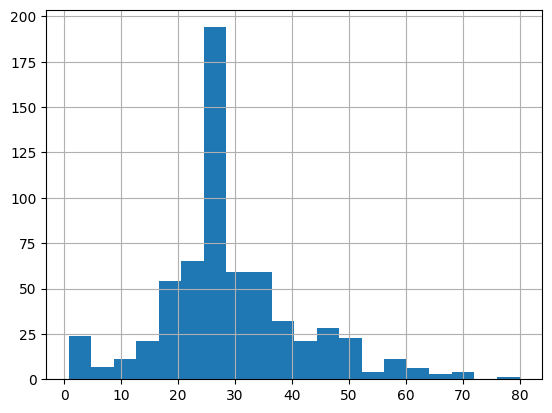

In [8]:
df_train.age.hist(bins=20)

#### Plot for the Gender distribution of passangers:

<Axes: ylabel='sex'>

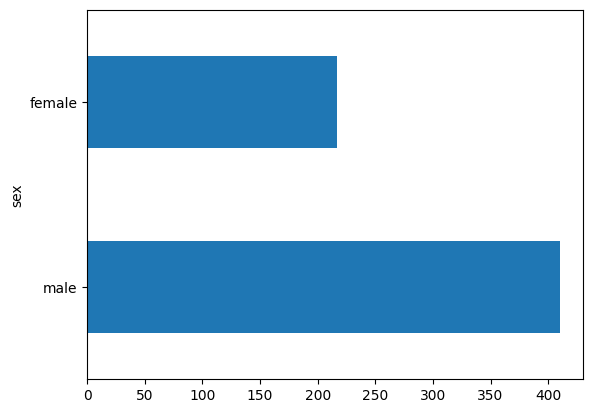

In [9]:
df_train.sex.value_counts().plot(kind='barh')

#### Plot for the 'seat-type' (classes) acquired by passangers:

<Axes: xlabel='class'>

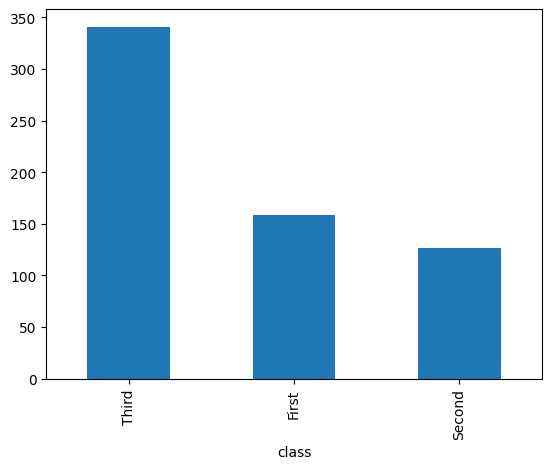

In [10]:
df_train['class'].value_counts().plot(kind='bar')

#### A combined graph showing the survival rate according to genders:

Text(0.5, 0, '% survive')

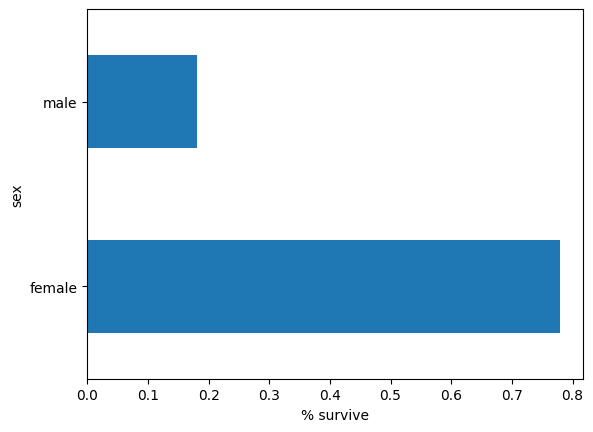

In [11]:
pd.concat([df_train, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

After analyzing the above graphs and information we can conclude that:


* Majority Passangers are in their 20's or 30's.
* Majority of Passangers are Male.
* Majority Passangers preferred 'Third Class'.
* Females have a much higher chance of Survival.





---



## Preparing the Dataset:

Categorical data is not just data that is not in integer format. It is data that represents categories or groups which do not have a numerical value in terms of measurement or quantity. They can be represented by strings, numbers, or symbols, but the numbers do not have a mathematical meaning in terms of magnitude or order.
<br>
<br>
Example:

            sex   age  n_siblings_spouses  parch     fare  class      deck
      0    male  22.0                   1      0   7.2500  Third   unknown
      1  female  38.0                   1      0  71.2833  First         C   
      2  female  26.0                   0      0   7.9250  Third   unknown
      3  female  35.0                   1      0  53.1000  Second        C

* In the above table we can see that the column 'sex' does not have any 'integer' classification, rather have 'string' classification.
* Now the problem is, our model cannot diffrentiate between different 'strings'.
* Therefore, we have to convert that 'string' into an integer format.

<br>

For Example: We can encode:
* ***male = 1*** and ***female = 0***. In the 'sex' column.
* ***First = 100*** and ***Second = 200*** and ***Third = 300***. In the 'class' column.


So the table now can be classifed like this:

            sex   age  n_siblings_spouses  parch     fare  class     deck
      0       1  22.0                   1      0   7.2500  300    unknown
      1       0  38.0                   1      0  71.2833  100          C   
      2       0  26.0                   0      0   7.9250  300    unknown
      3       0  35.0                   1      0  53.1000  200          C

<br>

**Why Encode Categorical Data?**

Machine learning models require numerical input. They cannot process categorical data in the form of strings directly. Therefore, we convert categorical data into a numerical format, a process known as encoding.


### Encoding Catagorical Data:

In [12]:
# Diffrentiating between Categorical and Numerical Data from the Dataset:
CATAGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

In [14]:
feature_columns = [] # Feature columns in machine learning serve as a bridge between raw data and the model or estimator. They define how raw input data should be transformed and used by the model.

for feature_name in CATAGORICAL_COLUMNS:
  vocabulary = df_train[feature_name].unique()  # get a list of all unique values from given column (CATAGORICAL_COLUMN in our case)
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def



---


Explaination of code:
<br>
<br>
Code:

`  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))`
<br>
<br>
Explaination:
`tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)` tells TensorFlow that there is a specific column in your data with categorical values. You specify the unique entries (e.g., ["red", "blue", "yellow"]), and TensorFlow will handle the processing of this categorical data for training and inference purposes.

---



In [15]:
df_train[feature_name].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.4583,  21.075 ,
        11.1333,  30.0708,  16.7   ,   8.05  ,  31.275 ,   7.8542,
        29.125 ,  13.    ,  18.    ,   7.225 ,  26.    ,  35.5   ,
        31.3875, 263.    ,   7.8792,   7.8958,  27.7208, 146.5208,
         7.75  ,  10.5   ,  82.1708,  52.    ,   7.2292,  11.2417,
         9.475 ,  21.    ,  41.5792,  15.5   ,  21.6792,  17.8   ,
        39.6875,  76.7292,  61.9792,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  56.4958,
         7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,   7.7875,
        47.1   ,  34.375 ,  61.175 ,  34.6542,  63.3583,  23.    ,
        77.2875,   8.6542,   7.775 ,  24.15  ,  14.4542,  14.4583,
       247.5208,   7.1417,   6.975 ,   7.05  ,  14.5   ,  15.0458,
        26.2833,   9.2167,  79.2   ,   6.75  ,  11.5   ,  12.525 ,
         7.3125,  61.3792,   7.7333,  69.55  ,  16.1   ,  55.    ,
        25.4667,  28.7125,   0.    ,  15.05  ,  22.025 ,  26.5

## Setting Up the pre-requisits for the Model:



### The Training Process

While training a model we don't give all the data at once to the model we give the data in ***small batches*** to the ML Model. We feed these batches to our model multiple times according to the number of ***epochs***.
<br>
<br>
An ***epoch*** is one stream of our dataset that is fed to the model. Number of ***epochs*** is the amount of time our model will see the same data.
<br>
<br>
Ex: If we have 10 ***epochs***, our model will see the same dataset 10 times.
<br>
<br>
As we need to feed data in batches and multiple times, we need to create an ***input function***. The function simply defines how our dataset will be converted into batches at each ***epoch***.

### Input Function

The TensorFlow Model we are going to use requires that, the data we pass it, comes in as `tf.data.dataset` object. This means we must create a ***input function*** that can convert our pandas dataframe into `tf.data.dataset` object efficiently.

In [16]:
# Function to create an input function for the TensorFlow model
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    # Inner function to be returned
    def input_function():
        # Convert the input data (data_df) and labels (label_df) into a TensorFlow Dataset
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))

        # Shuffle the dataset if specified
        if shuffle:
            ds = ds.shuffle(buffer_size=1000)

        # Batch and repeat the dataset
        ds = ds.batch(batch_size).repeat(num_epochs)

        # Return the prepared dataset
        return ds

    # Return the input function
    return input_function

In [17]:
# Create the input function for training data
train_input_fn = make_input_fn(df_train, y_train)

# Create the input function for testing data
test_input_fn = make_input_fn(df_test, y_test, num_epochs=1, shuffle=False)

### Creating the Model

We are going to use a linear estimator to utilize the linear regression algorithm.

In [18]:
linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier named as "feature_columns"

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


### Training the Model

Training the model is just passing the input function, that we created earlier.

In [19]:
import math

linear_est.train(train_input_fn) # training the model, by giving the `tf.data.dataset` object to the model
result = linear_est.evaluate(test_input_fn) # get the model statistics by testing it over the testing dataset

# 'result' is just a statistical dictionary of the linear_estimator's output.
clear_output() # clears the output of the cell

acc = result['accuracy']
acc_percentage = math.trunc(float(acc) * 100)
print(f"Accuracy: {acc}")
print(f"Accuracy in percentage: {acc_percentage}%")

print("==" * 10)

print("Displaying contents of the 'result' dictionary: ")
x = 1
for keys , values in result.items():
    print(x, end=".")
    x=x+1
    print(keys, end=": ")
    print(values)

Accuracy: 0.7196969985961914
Accuracy in percentage: 71%
Displaying contents of the 'result' dictionary: 
1.accuracy: 0.719697
2.accuracy_baseline: 0.625
3.auc: 0.81251913
4.auc_precision_recall: 0.754527
5.average_loss: 0.64135563
6.label/mean: 0.375
7.loss: 0.64547724
8.precision: 0.5912409
9.prediction/mean: 0.5627584
10.recall: 0.8181818
11.global_step: 200


### Predicting the output of the Model:

Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


<Axes: title={'center': 'predicted probabilities'}, ylabel='Frequency'>

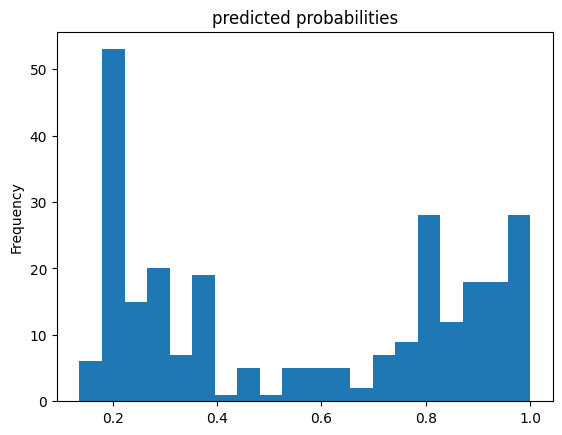

In [20]:
pred_dicts = list(linear_est.predict(test_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

In [22]:
result = list(linear_est.predict(test_input_fn))
clear_output()

index_of_person = int(input("Enter index to check a person's survival rate: "))
print(df_test.loc[index_of_person])

print("=="*10)

prob = result[index_of_person]['probabilities'][1]
prob_percentage = math.trunc(float(prob) * 100)
acc_result = y_test.loc[index_of_person]

print(f"Survival rate of this person is: {prob_percentage}%")
print(f"Actual result of their survival: {y_test.loc[index_of_person]}")

if acc_result == 0:
  print("This person did not survive.")
else:
  print("This person did survive.")

# 0 = not survived, 1 = survived.

Enter index to check a person's survival rate: 189
sex                          male
age                          23.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 189, dtype: object
Survival rate of this person is: 38%
Actual result of their survival: 0
This person did not survive.
